In [1]:
import sys
import PIL
import numpy as np
import tensorflow as tf
import config
import os
from matplotlib import pyplot as plt
import my_tools
from my_tools import get_image_with_label as get_image

In [2]:
img_size = config.CNN_IN_HEIGHT
src_dir = config.PIC_SRC_DIR
dst_dir = config.DATA_DIR
src_labels = config.LABEL_ORG

In [3]:
#Get conversions for TFRecord type file
def to_float_convert(value):
    return tf.train.Feature(float_list=tf.train.FloatList(value=[value]))
def to_int_convert(value):
    return tf.train.Feature(int64_list=tf.train.Int64List(value=[value]))
def to_bytes_convert(value):
    return tf.train.Feature(bytes_list=tf.train.BytesList(value=[value]))

In [9]:
def createTFRecord(file_name, index):
    """
    Codes data into TFRecord and according data type
    """
    path = os.path.join(config.DATA_DIR, file_name)
    writer = tf.python_io.TFRecordWriter(path)
    for i in range(len(index)):
        img, label = get_image(index[i])
        label = label.astype(np.int32)
        
        feature = {"image" : to_bytes_convert(img.tobytes()),
                   "class" : to_int_convert(label[0]),
                   "x1" : to_float_convert(label[1]),
                   "y1" : to_float_convert(label[2]),
                   "x2" : to_float_convert(label[3]),
                   "y2" : to_float_convert(label[4]),
                   "index" : to_int_convert(index[i])
                          
                  }
        
        example = tf.train.Example(features=tf.train.Features(feature=feature))
        writer.write(example.SerializeToString())
        
    writer.close()
    sys.stdout.flush()
        
        

In [10]:
def main(src_dir, dst_dir, src_labels, force = False):
    """
    Creates 3 datasets divided 6:2:2, train,test,val
    """
    labels = np.load(src_labels)
    files = os.listdir(src_dir)
    if len(files) == labels.shape[0]:
        print("Same ammount of labels and files")
    names = config.TFRECORD_NAMES
    if force == True:
        for n in range(0,3):
            to_rm = os.path.join(config.DATA_DIR, names[n])
            if os.path.exists(to_rm):   
                print("removing")
                os.remove(to_rm)
                
    index = np.random.permutation(labels.shape[0])
    train_index = index[0:int(0.6*len(index))]
    test_index = index[int(0.6*len(index)):int(0.8*len(index))]
    val_index = index[int(0.8*len(index)):]
    
    createTFRecord(names[0], train_index)
    print("created train record")
    createTFRecord(names[1], test_index)
    print("created test record")
    createTFRecord(names[2], val_index)
    print("created val record")

In [11]:
if __name__ == '__main__' :
    main(src_dir, dst_dir, src_labels, force = True)

Same ammount of labels and files
removing
removing
removing
created train record
created test record
created val record


In [7]:
#Scrypt to check if everything above works as supposed

path_to_record = os.path.join(config.DATA_DIR,config.TFRECORD_NAMES[0])
record_iterator = tf.python_io.tf_record_iterator(path=path_to_record)

for string_record in record_iterator:
    
     features = {"image" : tf.FixedLenFeature((),tf.string),
                   "class" : tf.FixedLenFeature((),tf.int64),
                   "x1" : tf.FixedLenFeature((),tf.int64),
                   "y1" : tf.FixedLenFeature((),tf.int64),
                   "x2" : tf.FixedLenFeature((),tf.int64),
                   "y2" : tf.FixedLenFeature((),tf.int64),
                   "index" : tf.FixedLenFeature((),tf.int64)}
        
    parsed_features = tf.parse_single_example(serialized_data, features)
    
    image_string = parsed_features["image"]
    image = tf.decode_raw(image_string,tf.float32)
    print(image.shape)
    #image = tf.reshape(image_decoded, shape=[256,256,3])
    label = tf.cast((parsed_features["class"], 
            parsed_features["x1"],
            parsed_features["y1"],
            parsed_features["x2"],
            parsed_features["y2"]), tf.int32)
    index = parsed_features["index"]
    
    return image, label, index
    
    img_1d = np.fromstring(img_string, dtype=np.uint8)
    reconstructed_img = img_1d.reshape((256, 256, -1))
    
    print(index)
    my_tools.show_opened_image(reconstructed_img)
    

IndentationError: unindent does not match any outer indentation level (<ipython-input-7-6e72d9c2381e>, line 16)

[1.         0.5625     0.40625    0.74609375 0.58984375]


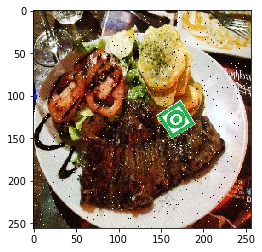

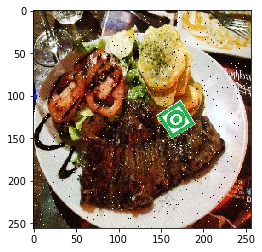

In [8]:
my_tools.show_image(4)
my_tools.show_label_on_img(4)